# EDA ENFRENTAMIENTOS MARVEL Y DC

Bibliotecas

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import modulo_toolbox as mtb
import toolbox_ML as tb


## DATASET MCU VS DC

#### Objetivos

**Principal**

Determinar las caracteristicas y factores clave que influyen en la victoria de un heroe en enfrentamientos, tanto en comics como en peliculas. 

**Secundarios** 
1. Analizar las diferencias en atributos (inteligencia, fuerza, durabilidad, poder y combate) entre los heroes ganadores y perdedores. 
2. Explorar como las caracteristicas del heroe (atributos y superpoderes) afectan a la probabilidad de ganar en comics y peliculas. 
3. Investigar si existen patrones o correlaciones significativas entre los atributos de los heroes y el resultado de sus enfrentamientos. 
4. Comparar las diferencias entre los resultados de enfrentamientos en comics y en peliculas 

#### Cargar data y primeras visualizaciones

In [2]:
# Cargar Data_final_comics_peliculas
df_comics_pelis = pd.read_csv('./data/Data_final_MCU_vs_DC.csv')

In [3]:
df_comics_pelis.head()

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
0,Envy,Ancient One,2,1,2,DC Extended Universe,65,65,65,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
1,Warlock,Ancient One,1,2,1,Marvel Cinematic Universe,45,50,25,35,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
2,Deadshot,Ancient One,2,1,2,DC Extended Universe,60,1,6,7,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
3,Doctor Fate,Ancient One,1,2,1,DC Extended Universe,85,75,60,45,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
4,Cull Obsidian,Ancient One,1,2,1,Marvel Cinematic Universe,60,75,20,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."


In [4]:
df_comics_pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  object
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  object
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              10640 non-null  object
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  object
 16  Inte

In [5]:
df_comics_pelis.value_counts()

Heroe 1                    Heroe 2                      Resultado_Comics  Resultado_Peliculas  Resultado_Combinado  Universe_1                 Intelligence_1  Strength_1  Speed_1  Durability_1  Power_1  Combat_1  Tier_1  Tier2_1  Superpowers_1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [6]:
df_comics_pelis.columns

Index(['Heroe 1', 'Heroe 2', 'Resultado_Comics', 'Resultado_Peliculas',
       'Resultado_Combinado', 'Universe_1', 'Intelligence_1', 'Strength_1',
       'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1',
       'Superpowers_1', 'Universe_2', 'Intelligence_2', 'Strength_2',
       'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2',
       'Superpowers_2'],
      dtype='object')

In [7]:
tb.describe_df(df_comics_pelis)

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
Data type,object,object,int64,int64,int64,object,int64,int64,object,int64,...,object,int64,int64,object,int64,int64,int64,int64,object,object
Percent missing (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.01279,0.0
Unique values,223,223,2,3,3,2,16,24,26,24,...,2,16,24,45,24,25,20,8,15,223
Cardinality percent (%),0.461516,0.461516,0.004139,0.006209,0.006209,0.004139,0.033113,0.04967,0.053809,0.04967,...,0.004139,0.033113,0.04967,0.093131,0.04967,0.051739,0.041392,0.016557,0.031044,0.461516


In [8]:
df_comics_pelis.describe()

,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Intelligence_1,Strength_1,Durability_1,Power_1,Combat_1,Tier_1,Intelligence_2,Strength_2,Durability_2,Power_2,Combat_2,Tier_2
count,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000
mean,1.502763,1.497154,1.502597,67.650407,38.875618,28.741241,47.465986,65.143215,2.125975,67.641921,38.875142,28.741075,47.468967,65.178398,2.126700
std,0.499998,0.500080,0.500164,14.190056,34.751590,19.679246,27.999794,22.075246,1.411182,14.178471,34.773776,19.701326,28.020184,22.055457,1.412312
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,60.000000,6.000000,15.000000,20.000000,50.000000,1.000000,60.000000,6.000000,15.000000,20.000000,50.000000,1.000000
50%,2.000000,1.000000,2.000000,65.000000,25.000000,25.000000,45.000000,70.000000,2.000000,65.000000,25.000000,25.000000,45.000000,70.000000,2.000000
75%,2.000000,2.000000,2.000000,75.000000,70.000000,40.000000,70.000000,80.000000,3.000000,75.000000,70.000000,40.000000,70.000000,80.000000,3.000000
max,2.000000,2.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,7.000000,100.000000,100.000000,100.000000,100.000000,100.000000,7.000000


Limpieza datos y tratamiento nulos 

In [9]:
df_comics_pelis['Tier2_2'].value_counts()

Tier2_2
4      2175
3      1949
1+     1075
1++     874
4+      871
1       650
7+      648
6++     435
4++     435
3+      431
5       217
0       217
0++     216
2       216
2++     215
Name: count, dtype: int64

In [10]:
# Tratamiento nulos
df_comics_pelis['Tier2_1'] = df_comics_pelis['Tier2_1'].fillna(0)
df_comics_pelis['Tier2_2'] = df_comics_pelis['Tier2_2'].fillna(0)

In [11]:
df_comics_pelis['Speed_2'].value_counts()

Speed_2
25     11082
25      3861
6       2830
20      2173
50      2165
1       1951
8       1526
11      1509
100     1304
6       1300
30      1295
1       1080
7       1075
8       1071
50       873
20       873
85       872
14       869
14       858
75       652
7        651
30       647
17       646
17       644
65       440
35       439
100      436
60       434
65       434
11       433
60       433
19       432
35       432
80       219
19       219
45       218
∞        218
0        218
10       217
70       217
13       216
80       215
15       214
0        214
15       214
Name: count, dtype: int64

In [12]:
# Transformacion columnas numericas de object a int
columns_to_convert = ['Speed_1', 'Speed_2', 'Tier2_1', 'Tier2_2'] 
df_comics_pelis[columns_to_convert] = df_comics_pelis[columns_to_convert].apply(pd.to_numeric, errors = 'coerce').fillna(0).astype(int)

In [13]:
df_comics_pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  object
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  int32 
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              48319 non-null  int32 
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  object
 16  Inte

In [14]:
tb.describe_df(df_comics_pelis)

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
Data type,object,object,int64,int64,int64,object,int64,int64,int32,int64,...,object,int64,int64,int32,int64,int64,int64,int64,int32,object
Percent missing (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique values,223,223,2,3,3,2,16,24,25,24,...,2,16,24,25,24,25,20,8,6,223
Cardinality percent (%),0.461516,0.461516,0.004139,0.006209,0.006209,0.004139,0.033113,0.04967,0.051739,0.04967,...,0.004139,0.033113,0.04967,0.051739,0.04967,0.051739,0.041392,0.016557,0.012417,0.461516


In [15]:
cat_var = ['Heroe 1', 'Universe_1', 'Superpowers_1', 'Heroe 2', 'Universe_2', 'Superpowers_2']
num_var = ['Intelligence_1', 'Intelligence_2','Strength_1', 'Strength_2', 'Speed_1', 'Speed_2','Durability_1', 'Durability_2', 'Power_1', 'Power_2','Combat_1', 'Combat_2','Tier_1', 'Tier_2', 
           'Tier2_1', 'Tier2_2' ,'Resultado_Peliculas', 'Resultado_Comics', 'Resultado_Combinado']

#### Univariante

Numericas

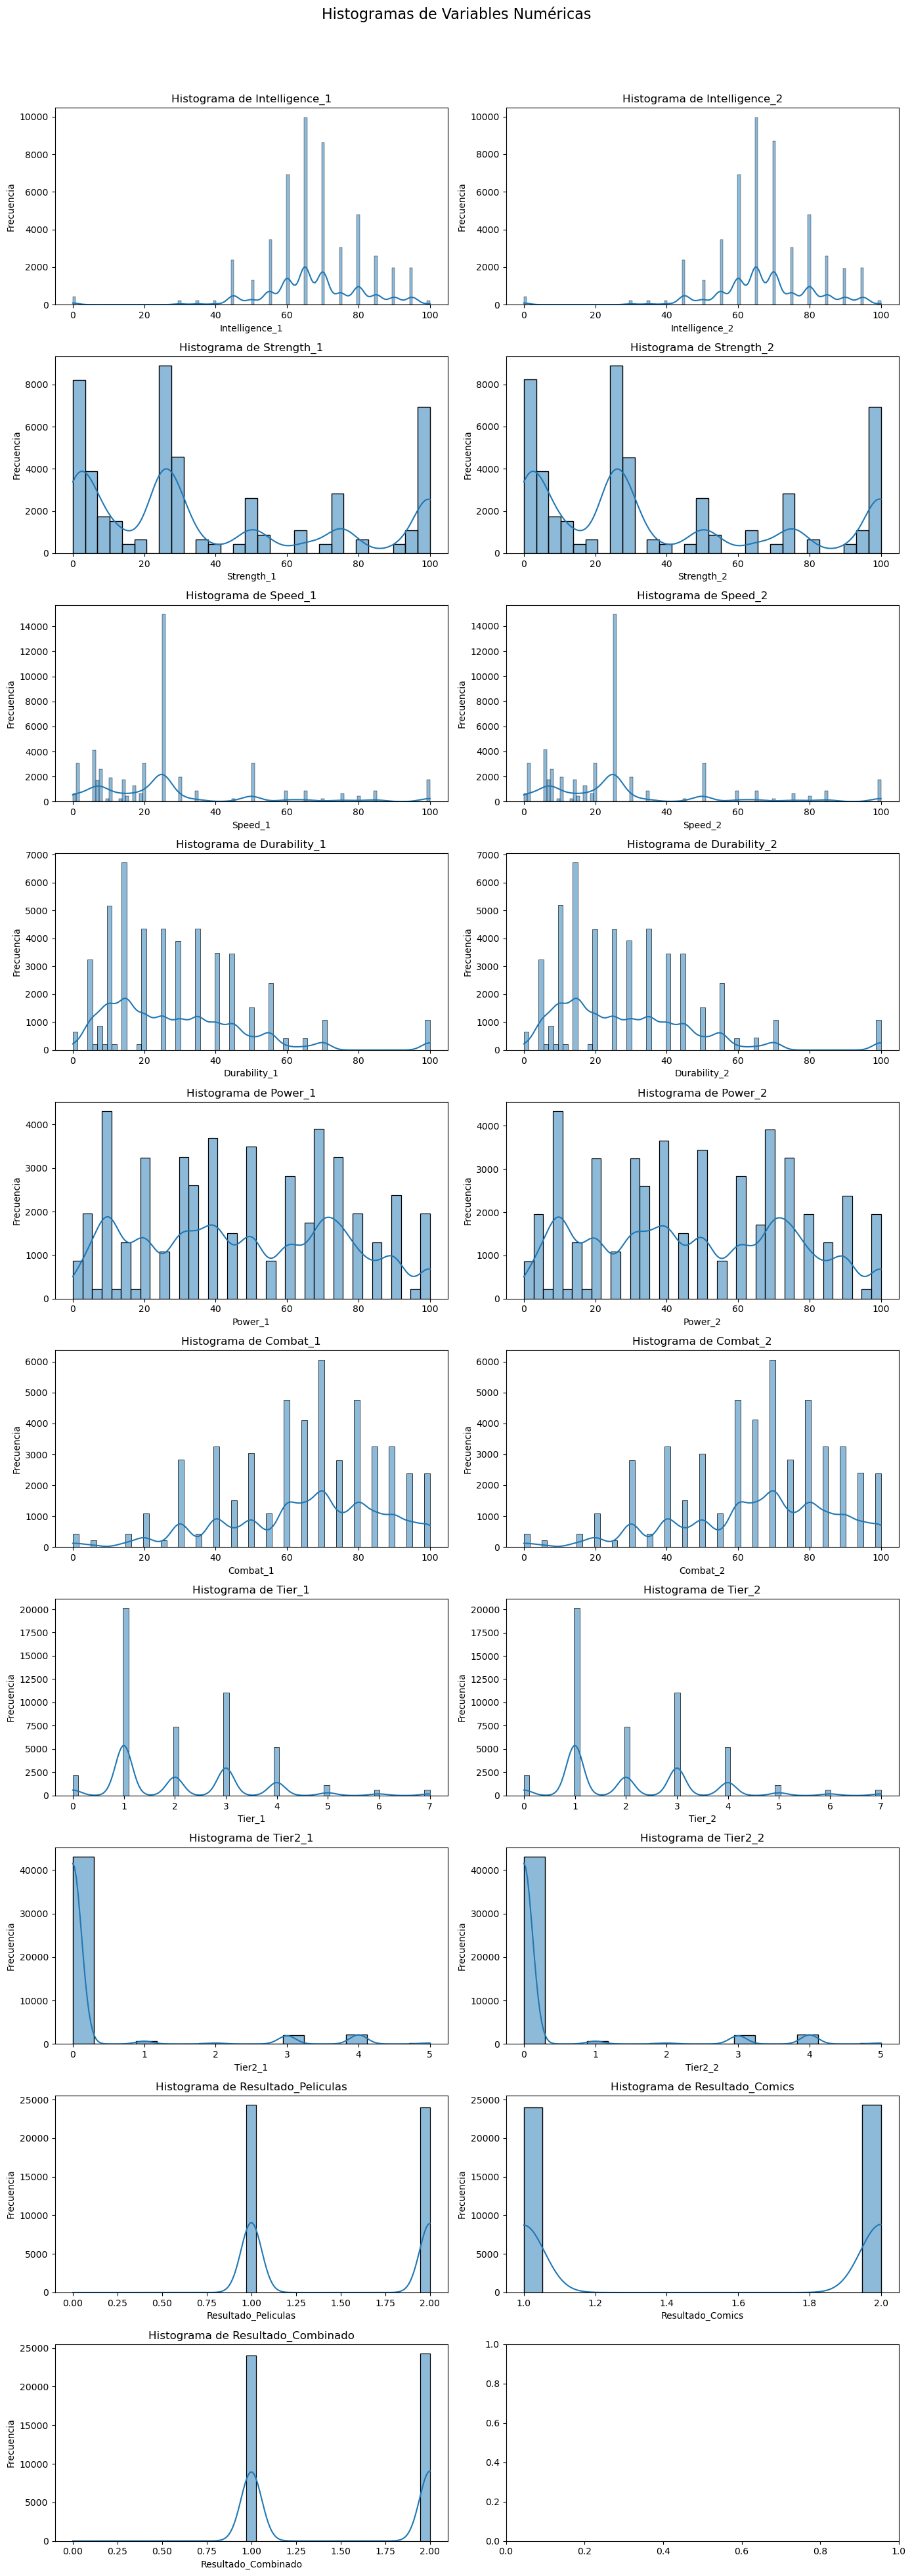

In [16]:
# Plot histogramas con variables numericas
fig, axes = plt.subplots(10, 2, figsize=(14, 40))
fig.suptitle('Histogramas de Variables Numéricas', fontsize=16)

for i, col in enumerate(num_var):
    sns.histplot(df_comics_pelis[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histograma de {col}')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


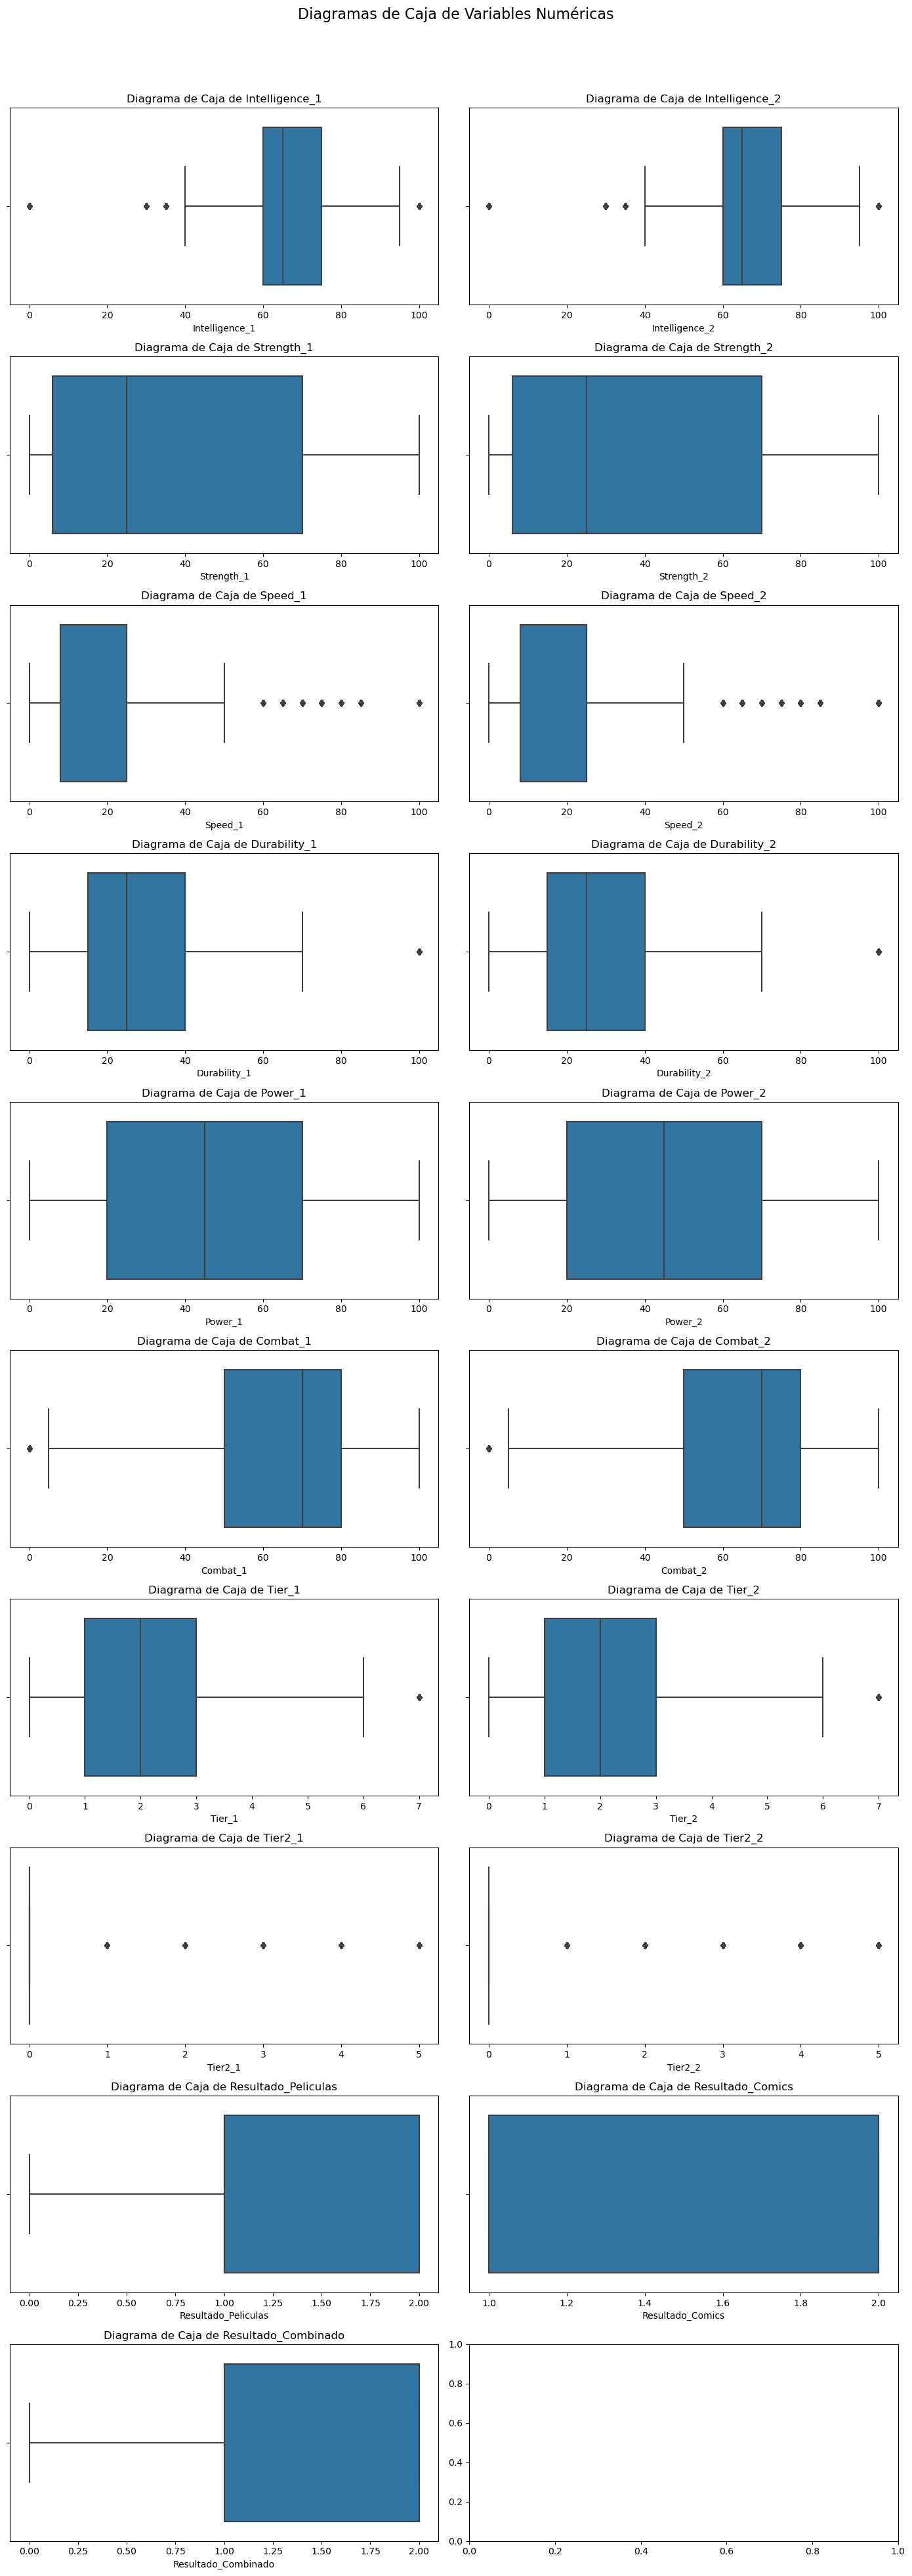

In [17]:
# Plot boxplots de las variables numericas
fig, axes = plt.subplots(10, 2, figsize=(14, 40))
fig.suptitle('Diagramas de Caja de Variables Numéricas', fontsize=16)

for i, col in enumerate(num_var):
    sns.boxplot(x=df_comics_pelis[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Diagrama de Caja de {col}')
    axes[i//2, i%2].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**CONCLUSIONES**

La distribucion de los atributos son muy similares entre 'Heroe 1' y 'Heroe 2', sugiere que ambos grupos de heroes tienen caracteristicas comparables en terminos de inteligencia, fuerza, velocidad, 
durabilidad, poder...

Categoricas

In [18]:
# Summarize value counts for categorical variables
for col in cat_var:
    print(f"Distribución de {col}:\n")
    print(df_comics_pelis[col].value_counts(), "\n")


Distribución de Heroe 1:

Heroe 1
Spectral Vision    222
Yondu              221
Dar-Benn           221
Hulk               221
Slipknot           221
                  ... 
Leo Fitz           212
Aquaman            212
Corvus Glaive      212
Joker              211
Namor              210
Name: count, Length: 223, dtype: int64 

Distribución de Universe_1:

Universe_1
Marvel Cinematic Universe    32728
DC Extended Universe         15591
Name: count, dtype: int64 

Distribución de Superpowers_1:

Superpowers_1
['Agility', 'Durability', 'Intangibility', 'Intelligence', 'Stamina', 'Super Speed', 'Super Strength', 'Toxin and Disease Resistance', 'Changing Armor', 'Cold Resistance', 'Density Control', 'Dexterity', 'Electricity Resistance', 'Endurance', 'Energy Beams', 'Energy Blasts', 'Energy Resistance', 'Enhanced Memory', 'Fire Resistance', 'Flight', 'Hacking', 'Heat Generation', 'Heat Resistance', 'Invulnerability', 'Jump', 'Longevity', 'Marksmanship', 'Master Martial Artist', 'Phasing', 'R

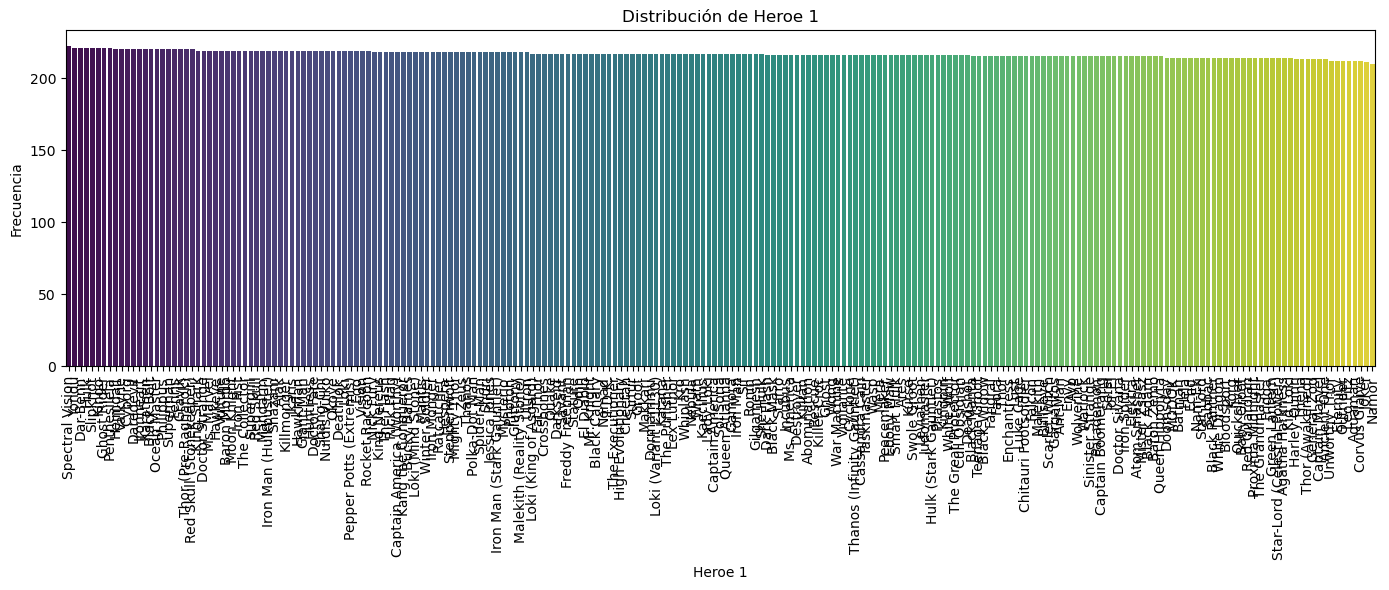

In [19]:
# Plot bar plot for 'Heroe 1'
plt.figure(figsize=(14, 6))
serie = df_comics_pelis['Heroe 1'].value_counts()
sns.barplot(x=serie.index, y=serie, palette='viridis')
plt.title('Distribución de Heroe 1')
plt.xlabel('Heroe 1')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


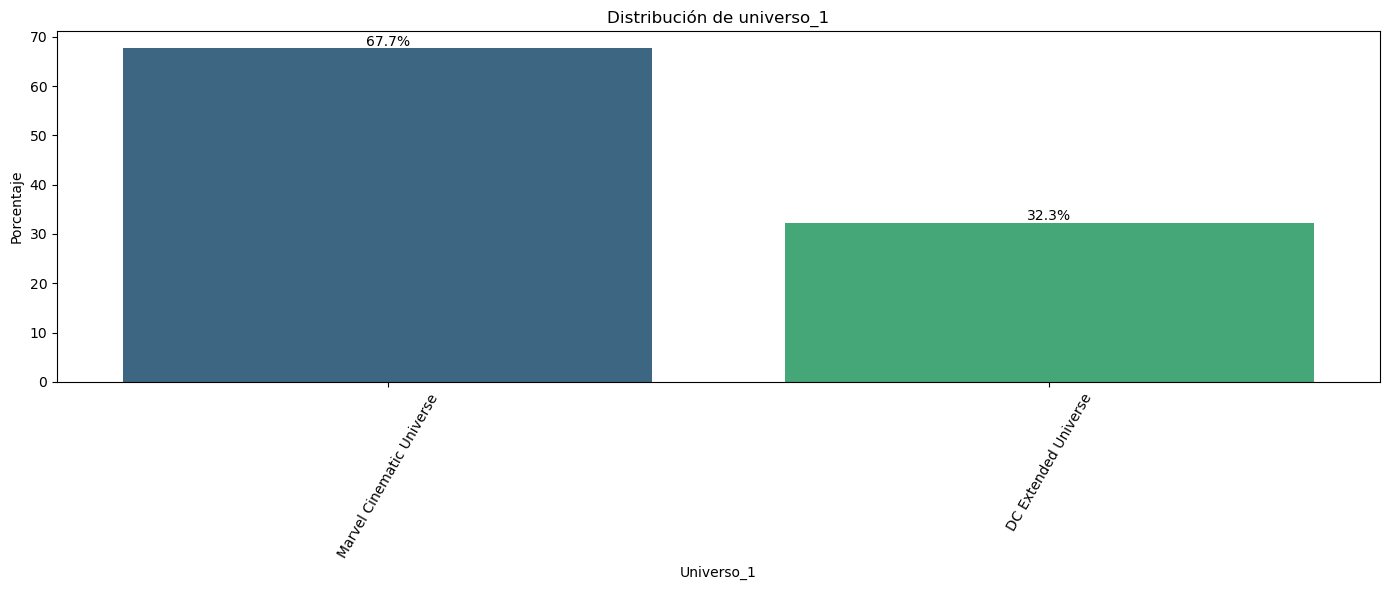

In [27]:
# Generar la serie de valores contados
serie = df_comics_pelis['Universe_1'].value_counts()

# Calcular los porcentajes
total = serie.sum()
percentages = (serie / total) * 100

# Crear el gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(x=percentages.index, y=percentages, palette='viridis')
plt.title('Distribución de universo_1')
plt.xlabel('Universo_1')
plt.ylabel('Porcentaje')
plt.xticks(rotation=60)

# Añadir etiquetas de porcentaje encima de las barras
for index, value in enumerate(percentages):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')

plt.tight_layout()
plt.show()


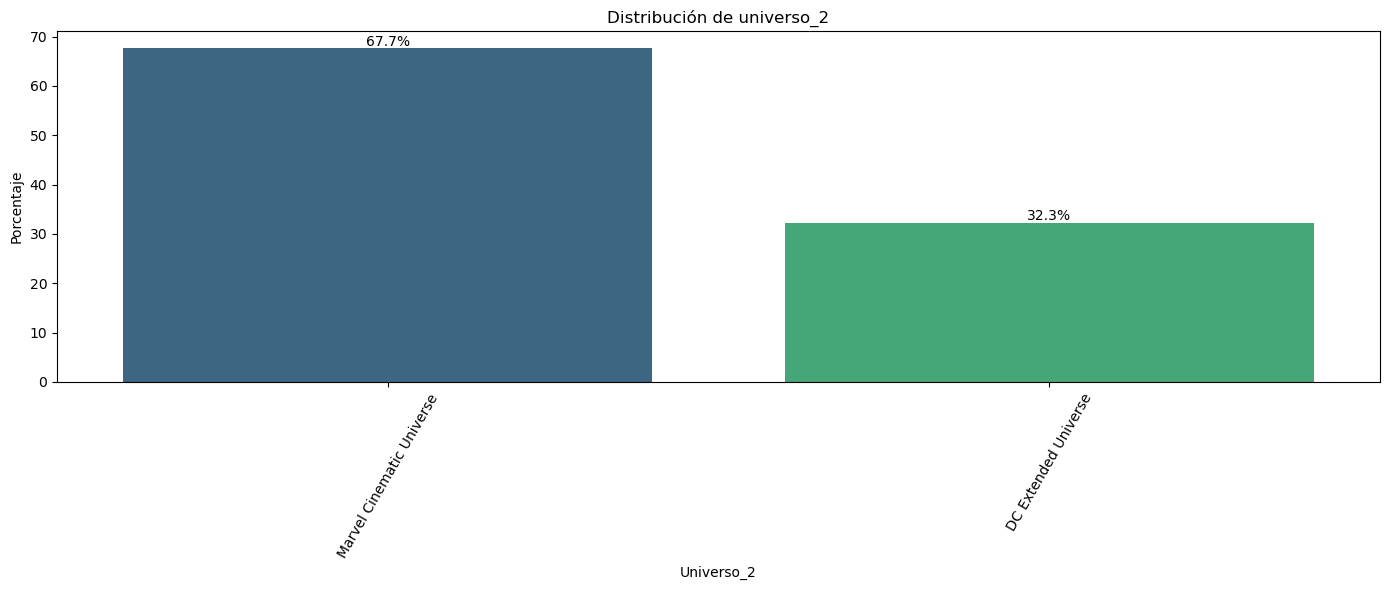

In [26]:
# Generar la serie de valores contados
serie = df_comics_pelis['Universe_2'].value_counts()

# Calcular los porcentajes
total = serie.sum()
percentages = (serie / total) * 100

# Crear el gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(x=percentages.index, y=percentages, palette='viridis')
plt.title('Distribución de universo_2')
plt.xlabel('Universo_2')
plt.ylabel('Porcentaje')
plt.xticks(rotation=60)

# Añadir etiquetas de porcentaje encima de las barras
for index, value in enumerate(percentages):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')

plt.tight_layout()
plt.show()


#### Hipotesis

1. Los heroes con mayores atributos de fuerza y poder tiene una mayor probabilidad de ganar

2. Existe una diferencias significativa en los resultados de los enfrentamientos entre comics y peliculas 

3. Los atributos de inteligencia y combate tiene una correlacion positiva significativa con las victorias 

4. Los heroes del mismo universo tiene patrones similares de victorias y derrotas

5. Los valores atipicos (outliers) en atributos especificos tiene un impacto desproporcionado en el resutlado de los enfrentamientos 